Wyznacz wartości współczynników aproksymacji trygonometrycznej zakładając postać funkcji
aproksymującej:
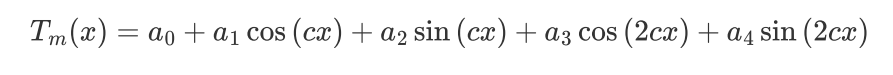
dla następującego zbioru danych:

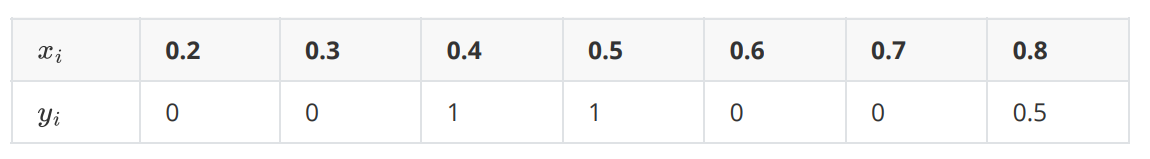

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#definiowanie zmiennych
xi = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
yi = np.array([0, 0, 1, 1, 0, 0, 0.5])
n = 6
a = 0.2
b = 0.8
h = (b-a)/n
l = (n+1)*h/2
c = np.pi/l

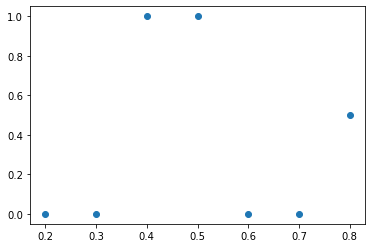

In [3]:
plt.scatter(xi,yi)

In [4]:
#tworzenie wierszy macierzy MT
ones=np.array([1 for _ in range(7)])
cos_cx=np.array([np.cos(c*x) for x in xi])
sin_cx=np.array([np.sin(c*x) for x in xi])
cos_2cx=np.array([np.cos(2*c*x) for x in xi])
sin_2cx=np.array([np.sin(2*c*x) for x in xi])

In [5]:
#inicjowanie macierzy MT i transponowanie do macierzy M
MT=np.vstack((ones, cos_cx, sin_cx, cos_2cx, sin_2cx))
M = MT.transpose()

In [6]:
#Wykonywanie mnożenia macierzowego i wyznaczenie współczynników diagonalnych
MTxM=np.matmul(MT,M)
MTxY=np.matmul(MT,yi)
Mdiag=np.diag(MTxM)

In [7]:
#wyliczanie współczynników a0-a4
a = np.array([MTxY[index]/Mdiag[index] for index in range(5)])

In [16]:
#podstawienie współczynników do funkcji
x = np.arange(0.2,0.9,h)
T1=[a[0] + a[1]*np.cos(c*x)]
T2 = [a[0] + a[1]*np.cos(c*x) + a[2]*np.sin(c*x)]
T3 = [a[0] + a[1]*np.cos(c*x) + a[2]*np.sin(c*x)+  a[3]*np.cos(2*c*x)]
T4 = [a[0] + a[1]*np.cos(c*x) + a[2]*np.sin(c*x)+  a[3]*np.cos(2*c*x)+ a[4]*np.sin(2*c*x)]

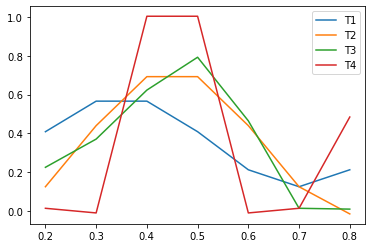

In [26]:
#tworzenie wykresu funkcji aproksymacji
plt.plot(x,T1[0],x,T2[0],x,T3[0],x,T4[0])
plt.legend(['T1','T2','T3','T4'])
plt.savefig('zad6.png')
plt.show()